# Python Notebook: MSc Practical (Unassessed)
### Course on Statistical Machine Learning

In [4]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse
font = {'size'   : 18}
plt.rc('font', **font)

### Create data

In [5]:
# set the seed 
np.random.seed(1)
# Create dataset
n = 100
mu = 10
X = mu + 6*(np.random.uniform(size=2*n)-.5)
y = .5*(X-mu)**3+(X-mu)**2+4*np.sin(2*np.pi*((X-mu)**3-(X-mu)))+4*np.sqrt(np.abs(.5+(X-mu)))*np.random.normal(size=2*n)

X_train = X[0:n]
X_test = X[n:(2*n)]
y_train = y[0:n]
y_test = y[n:(2*n)]
print(X_train.shape)
print(X_test.shape)

df_train = pd.DataFrame({'x':X_train, 'y':y_train})
df_test = pd.DataFrame({'x':X_test, 'y':y_test})
df_train.to_csv('regression_train.csv', index = False)
df_test.to_csv('regression_test.csv', index = False)

(100,)
(100,)


### Import data

In [6]:
# Set the seed for reproducibility
np.random.seed(0)
df_train = pd.read_csv('regression_train.csv')
X_train = df_train['x'].values.reshape(-1,1)
y_train = df_train['y'].values.reshape(-1,1)

df_test = pd.read_csv('regression_test.csv')
X_test = df_test['x'].values.reshape(-1,1)
y_test = df_test['y'].values.reshape(-1,1)

### Visualisation

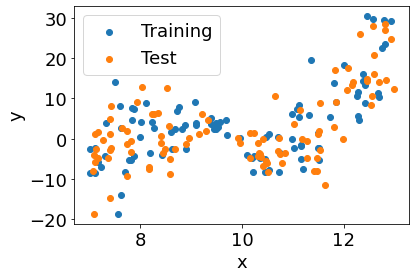

In [7]:
plt.figure()
plt.scatter(X_train,y_train)
plt.scatter(X_test, y_test)
plt.legend(['Training', 'Test'])
plt.xlabel('x')
plt.ylabel('y');

In [37]:
?PolynomialFeatures
poly = PolynomialFeatures(degree=1)
Phi_train = poly.fit_transform(X_train)
Phi_test = poly.fit_transform(X_test)

Object `mean_squared_error` not found.
59.85412299873803
63.26276699962041
beta= [[-24.28226663   2.78327901]]


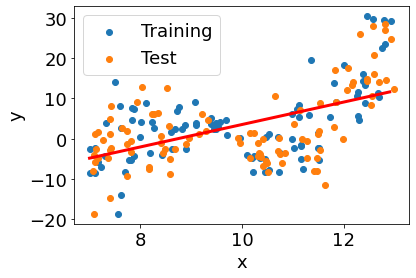

In [24]:
# Fit a linear regression model
?LinearRegression
regr = LinearRegression(fit_intercept=False)
regr.fit(Phi_train, y_train)

R_train = mse(y_train, regr.predict(Phi_train))
R_test = mse(y_test, regr.predict(Phi_test))
print(R_train)
print(R_test)
print('beta=', regr.coef_[:])

# Grid of values for plotting
x0 = np.arange(np.min(X), np.max(X), .1).reshape(-1,1)
plt.figure()
plt.scatter(X_train,y_train)
plt.scatter(X_test, y_test)
plt.legend(['Training', 'Test'])
plt.xlabel('x')
plt.ylabel('y');
y0 = regr.predict(poly.fit_transform(x0))
plt.plot(x0,y0, color='red', linewidth = 3);

### Gradient Descent No scaling

In [27]:
def GD(Phi, y, T, eta):
    n = Phi.shape[0] # Modif
    beta = np.zeros(shape=(2, T)) # beta(0) = (0, 0)
    J = np.zeros(shape=(T))
    J[0] = mse(y, Phi @ beta[:,[0]]) #@ for matrix multiplication
    for t in range(T-1):
        beta[:,[t+1]] = beta[:,[t]] - 2*eta/n * Phi.T @ (Phi @ beta[:,[t]] - y)
        J[t+1] = mse(y, Phi @ beta[:,[t+1]]) # compute empirical risk    
    return beta, J

In [28]:
T = 20000
eta = 0.005 # Note: Modif
beta, J = GD(Phi_train, y_train, T, eta)

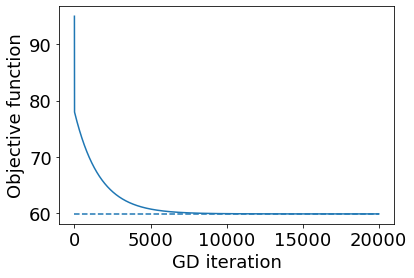

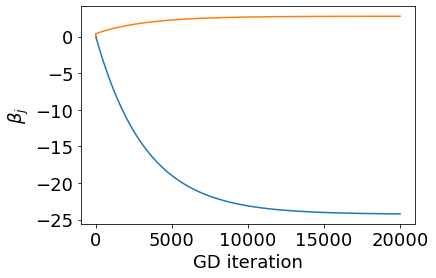

In [9]:
plt.figure()
plt.plot(J)
plt.hlines(R_train, 0, T, linestyles='--') # objective function converges to the MSE (empirical risk) of training data
plt.xlabel('GD iteration')
plt.ylabel('Objective function')

plt.figure()
plt.plot(beta.T);
plt.xlabel('GD iteration')
plt.ylabel(r'$\beta_j$');

### Gradient descent with rescaled features

In [31]:
# Rescale features
?StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

Phi_train_sc = poly.fit_transform(X_train_sc)
Phi_test_sc = poly.fit_transform(X_test_sc)

In [11]:
# Fit a linear regression model again
regr = LinearRegression(fit_intercept=False)
regr.fit(Phi_train_sc, y_train)

R_train = mse(y_train, regr.predict(Phi_train_sc))
R_test = mse(y_test, regr.predict(Phi_test_sc))
print(R_train)
print(R_test)
print('beta=', regr.coef_[:])

59.85412299873803
63.26276699962042
beta= [[3.31468942 4.91641006]]


In [32]:
T = 100
eta = 0.1
beta, J = GD(Phi_train_sc, y_train, T, eta)

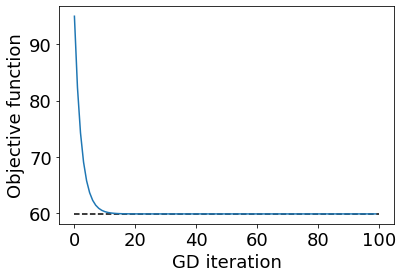

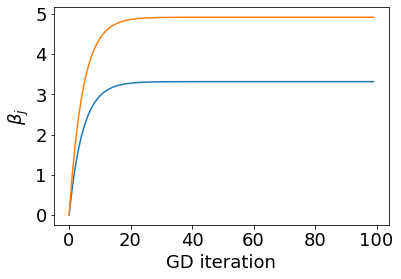

In [33]:
plt.figure()
plt.plot(J)
plt.hlines(R_train, 0, T, linestyles='--')
plt.xlabel('GD iteration')
plt.ylabel('Objective function')

plt.figure()
plt.plot(beta.T);
plt.xlabel('GD iteration')
plt.ylabel(r'$\beta_j$');

### Stochastic gradient descent

In [34]:
def SGD(Phi, y, T, eta):
    n = Phi.shape[0]
    beta = np.zeros(shape=(2, T))
    J = np.zeros(shape=(T))
    J[0] = mse(y, Phi @ beta[:,[0]])
    for t in range(T-1):
        ind = np.random.choice(np.arange(n)) # index of mini-batch sample of size 1        
        beta[:,[t+1]] = beta[:,[t]] - 2*eta[t] * Phi[[ind],:].T @ (Phi[[ind],:] @ beta[:,[t]] - y[ind])
        J[t+1] = mse(y, Phi @ beta[:,[t+1]]) # compute empirical risk    
    return beta, J

In [35]:
T = 1000
eta = .1* 1/pow(1 + np.arange(T), 0.9)
beta, J = SGD(Phi_train_sc, y_train, T, eta)

Text(0, 0.5, '$\\beta_j$')

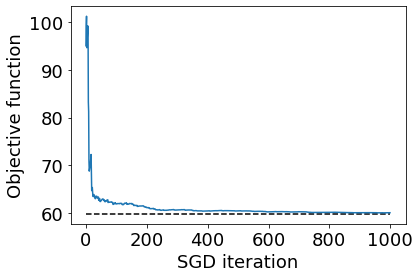

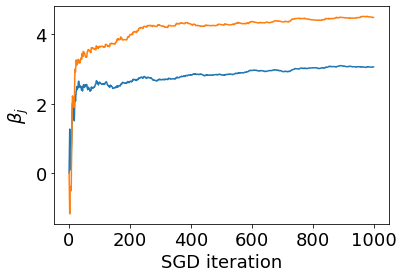

In [36]:
plt.figure()
plt.plot(J)
plt.hlines(R_train, 0, T, linestyles='--')
plt.xlabel('SGD iteration')
plt.ylabel('Objective function')

plt.figure()
plt.plot(beta.T);
plt.xlabel('SGD iteration')
plt.ylabel(r'$\beta_j$')

### Polynomial regression

In [17]:
Mmax = 12
R_train = np.zeros(shape=(Mmax+1, 1))
R_test = np.zeros(shape=(Mmax+1, 1))
for M in range(Mmax+1):
    # Create features
    poly = PolynomialFeatures(degree = M)
    Phi_train = poly.fit_transform(X_train)
    Phi_test = poly.fit_transform(X_test)
    
    # Fit linear model
    regr = LinearRegression(fit_intercept=False)
    regr.fit(Phi_train, y_train) # fit Mmax+1 models
    
    # Compute risk
    R_train[M] = mse(y_train, regr.predict(Phi_train))
    R_test[M] = mse(y_test, regr.predict(Phi_test))

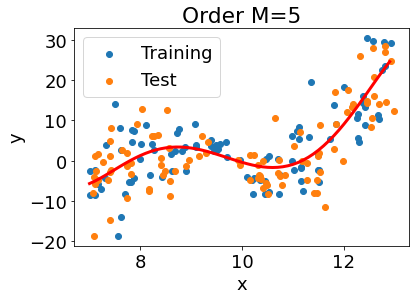

In [18]:
Mhat = np.argmin(R_test) #  best model on test set

# Create features
poly = PolynomialFeatures(degree = Mhat)
Phi_train = poly.fit_transform(X_train)
Phi_test = poly.fit_transform(X_test)
# Fit a linear regression model
regr = LinearRegression(fit_intercept=False)
regr.fit(Phi_train, y_train)

# Grid of values for plotting
#x0 = np.arange(np.min(X), np.max(X), .1).reshape(-1,1)
plt.figure()
plt.scatter(X_train,y_train)
plt.scatter(X_test, y_test)
plt.legend(['Training', 'Test'])
plt.xlabel('x')
plt.ylabel('y');
y0 = regr.predict(poly.fit_transform(x0))
plt.plot(x0,y0, color='red', linewidth = 3)
plt.title('Order M=' + np.str(Mhat));

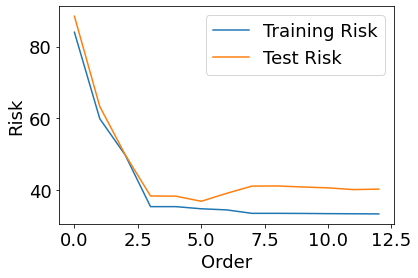

In [19]:
plt.figure()
plt.plot(R_train)
plt.plot(R_test)
plt.legend(['Training Risk', 'Test Risk']);
plt.xlabel('Order')
plt.ylabel('Risk');

### Ridge regression

In [20]:
# Note that here Phi does not include the bias term, i.e. column of 1 (easier to standardise the matrix), so we set fit_intercept = True in the function Ridge
# Alternatively, you can include the bias term, standardise all the columns of Phi instead of the first one, then use the Ridge function with fit_intercept=False

poly = PolynomialFeatures(degree = 12, include_bias=False)
Phi_train = poly.fit_transform(X_train) 
Phi_test = poly.fit_transform(X_test)

scaler = StandardScaler()
scaler.fit(Phi_train) 
Phi_train_sc = scaler.transform(Phi_train)
Phi_test_sc = scaler.transform(Phi_test)


lambda_all = pow(10, np.arange(-12, 3, .1))
R_train = np.zeros(shape=(lambda_all.shape[0], 1))
R_test = np.zeros(shape=(lambda_all.shape[0], 1))
for (i, lam) in enumerate(lambda_all): #(i, lam) is for (count, value)
    # Fit linear model with L2 penalty
    regr = Ridge(fit_intercept=True, alpha=lam)
    regr.fit(Phi_train_sc, y_train)
    
    # Compute risk
    R_train[i] = mse(y_train, regr.predict(Phi_train_sc))
    R_test[i] = mse(y_test, regr.predict(Phi_test_sc))
    

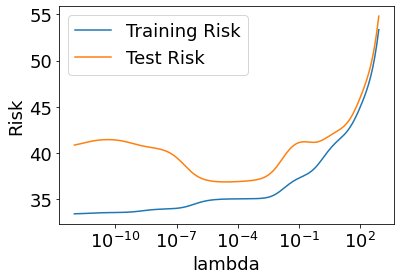

In [21]:
plt.figure()
plt.semilogx(lambda_all, R_train) #log scale for x
plt.semilogx(lambda_all, R_test)
plt.legend(['Training Risk', 'Test Risk']);
plt.xlabel('lambda')
plt.ylabel('Risk');

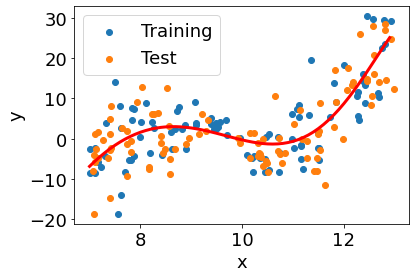

In [22]:
ind = np.argmin(R_test) #  best model on test set
lamhat = lambda_all[ind] # find the corresponding lambda that gives the smallest test risk
# Fit
regr = Ridge(fit_intercept=True, alpha=lamhat) # MODIF HERE
regr.fit(Phi_train_sc, y_train)

# Grid of values for plotting
#x0 = np.arange(np.min(X), np.max(X), .1).reshape(-1,1)
plt.figure()
plt.scatter(X_train,y_train)
plt.scatter(X_test, y_test)
plt.legend(['Training', 'Test'])
plt.xlabel('x')
plt.ylabel('y');
y0 = regr.predict(scaler.transform(poly.fit_transform(x0)))
plt.plot(x0,y0, color='red', linewidth = 3);